In [71]:
#Importing the libraries for the garphs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

#importing the libraries for datapeprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

#importing the libraries for splitting the data
from sklearn.model_selection import train_test_split

#Libraries for model building
from sklearn import linear_model
from lightgbm import LGBMRegressor

#import the libraries for checking the metrics
from sklearn.metrics import r2_score,mean_squared_error

reading the input files

In [4]:
df_train = pd.read_csv("airbnb_listing_train.csv.zip")
df_validate = pd.read_csv("airbnb_listing_validate.csv")

Explanatory Data Analysis ...Knowing about the data

In [5]:
def aboutdf (df):
    count_null = df.isnull().sum()
    df_stats = pd.DataFrame(index = df.columns, data =
                           {'datatype': df.dtypes,
                            'unique_values': df.nunique(),
                            'have_null?': df.isnull().any(),
                            'Number of null values' : count_null,
                            'percentage of null values' : count_null/df.shape[0]*100 })
    return df_stats


In [6]:
aboutdf(df_train)

,datatype,unique_values,have_null?,Number of null values,percentage of null values
id,int64,12901,False,0,0.000000
name,object,12653,True,22,0.170529
host_id,int64,11601,False,0,0.000000
host_name,object,4536,True,8,0.062011
neighbourhood_group,float64,0,True,12901,100.000000
neighbourhood,object,22,False,0,0.000000
latitude,float64,5227,False,0,0.000000
longitude,float64,7887,False,0,0.000000
room_type,object,4,False,0,0.000000
minimum_nights,int64,56,False,0,0.000000


Dropping the neighbourhood_group column as it has 100 percent null values

In [7]:
df_train=df_train.drop(columns='neighbourhood_group',axis=1)

In [8]:
bool_series = pd.notnull(df_train["name"])
df_train[bool_series].name


0                      Luxury home 100m2+garden in center!
1                              East is where your home is!
2          Amsterdam Central - LUXURY house in BUSY STREET
3                               great appartment down town
4            Private room with canal view in peaceful area
                               ...                        
12896    Quiet stylish private room 15 mins to city  ce...
12897    Beautiful, spacious apt. with great views @ IJ...
12898                  Great apartment de Pijp/Albert Cuyp
12899             Stylish apartment in an amazing location
12900                     Amsterdam Apartments First Floor
Name: name, Length: 12879, dtype: object

In [9]:
df_train.name.describe()

count         12879
unique        12653
top       Amsterdam
freq             28
Name: name, dtype: object

There are 12653 unique airbnb apartments/rooms

In [10]:
df_train[bool_series].groupby(['name']).size().sort_values(ascending=False).reset_index(name='count').head(100)

,name,count
0,Amsterdam,28
1,Spacious apartment near Vondelpark,6
2,Lovely apartment in Amsterdam,5
3,Spacious apartment in Amsterdam,5
4,Cosy apartment in the city centre of Amsterdam,4
...,...,...
95,Home sweet home,2
96,Spacious private room in the heart of Amsterdam,2
97,Light appartment in Amsterdam,2
98,NEW! Temporary housing in the centre of Amsterdam,2


In [11]:
d=df_train[bool_series].groupby(['name']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.bar(d,
                           y='name',
                           x='count',
                           #size='count',
                           #color='name',
                           range_x=[0,30]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [12]:
df_train.host_name.describe()

count       12893
unique       4536
top       Martijn
freq           76
Name: host_name, dtype: object

In [13]:
bool_series1 = pd.notnull(df_train["host_name"])
df_train[bool_series1].host_name


0        Marjolein
1              Ana
2             Mark
3            Ayden
4           Alissa
           ...    
12896     Michelle
12897         Rens
12898     Francien
12899         Olaf
12900         City
Name: host_name, Length: 12893, dtype: object

In [14]:
df_train[bool_series1].groupby(['host_name']).size().sort_values(ascending=False).reset_index(name='count').head(100)


,host_name,count
0,Martijn,76
1,Anne,58
2,Thomas,53
3,Tim,51
4,Marieke,51
...,...,...
95,Sara,20
96,Steven,20
97,Floor,20
98,Dennis,20


In [15]:
d=df_train[bool_series1].groupby(['host_name']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.bar(d,
                           y='host_name',
                           x='count',
                           #size='count',
                           #color='name',
                           range_x=[0,80]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

As you can see in the graph above Martijn has hosted 76 times ...

Now lets check about neighbourhood

In [16]:
df_train.neighbourhood.describe()

count                      12901
unique                        22
top       De Baarsjes - Oud-West
freq                        2209
Name: neighbourhood, dtype: object

In [17]:
df_train.groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='count')

,neighbourhood,count
0,De Baarsjes - Oud-West,2209
1,De Pijp - Rivierenbuurt,1600
2,Centrum-West,1429
3,Centrum-Oost,1097
4,Westerpark,958
5,Zuid,924
6,Oud-Oost,831
7,Bos en Lommer,730
8,Oostelijk Havengebied - Indische Buurt,644
9,Watergraafsmeer,381


In [18]:
d=df_train.groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.bar(d,
                           y='neighbourhood',
                           x='count',
                           #size='count',
                           #color='name',
                           range_x=[0,2500]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

De Baarsjes - Oud-West is the most selected neigbourhood by the airbnd customers.

lets know check about the room_type details

In [19]:
df_train.room_type.unique

<bound method Series.unique of 0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4           Private room
              ...       
12896    Entire home/apt
12897    Entire home/apt
12898    Entire home/apt
12899    Entire home/apt
12900         Hotel room
Name: room_type, Length: 12901, dtype: object>

In [20]:
d=df_train.groupby(['room_type']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.bar(d,
                           y='room_type',
                           x='count',
                           #size='count',
                           #color='name',
                           #range_y=[0,5]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

Looks like the customers prefer the enite home very few customers  prefered shared rooms.

lets now check about the minimum number of nights  the customer want to book

In [21]:
df_train.minimum_nights.describe()

count    12901.000000
mean         3.542516
std         15.154077
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1001.000000
Name: minimum_nights, dtype: float64

Looks like customers prefer booking for minimum one day and maximum 1001 days. on an average customers pefer booking for 3 days.


In [22]:
d=df_train.groupby(['minimum_nights']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.scatter(d,
                           x='minimum_nights',
                           y='count',
                           size='minimum_nights',
                           color='minimum_nights',
                           range_x=[0,1005],
                           range_y=[0,80]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

know lets check about number_of_reviews

In [23]:
df_train.number_of_reviews.describe()

count    12901.000000
mean        24.803194
std         53.406134
min          0.000000
25%          2.000000
50%          9.000000
75%         24.000000
max        843.000000
Name: number_of_reviews, dtype: float64

Above we can see there are average of 24 reviews and a maximum of 843 reviews ...lets look deeper

In [24]:
df_train.groupby(['number_of_reviews']).size().sort_values(ascending=False).reset_index(name='count')

,number_of_reviews,count
0,0,1596
1,1,928
2,2,761
3,3,661
4,4,590
...,...,...
357,116,1
358,312,1
359,311,1
360,306,1


In [25]:
d=df_train.groupby(['number_of_reviews']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.scatter(d,
                           x='number_of_reviews',
                           y='count',
                           size='count',
                           color='number_of_reviews',
                           range_y=[0,1700],
                           range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

lets check for the last_review column details

In [26]:
df_train.last_review.describe()

count          11305
unique          1495
top       08-03-2020
freq             269
Name: last_review, dtype: object

In [27]:
df_train.last_review

0        15-02-2020
1        19-06-2019
2        16-03-2020
3        17-02-2020
4        26-02-2020
            ...    
12896    13-09-2017
12897    25-02-2020
12898    07-10-2018
12899    28-04-2019
12900    17-02-2020
Name: last_review, Length: 12901, dtype: object

In [28]:
d=df_train.groupby(['last_review']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.scatter(d,
                           x='last_review',
                           y='count',
                           size='count',
                           color='last_review',
                           range_y=[0,300],
                           #range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

lets check about reviews_per_month column

In [29]:
df_train.reviews_per_month.describe()

count    11305.000000
mean         0.748501
std          1.260791
min          0.010000
25%          0.180000
50%          0.380000
75%          0.770000
max         50.000000
Name: reviews_per_month, dtype: float64

so per month atleast onew review they will recieve and maximun of 70 reviews.

plot a graph showing with host_name has got the number of reviews per month.

lets check about the  calculated_host_listings_count coulmn

In [30]:
df_train.calculated_host_listings_count.describe()

count    12901.000000
mean         2.136501
std          6.001838
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         78.000000
Name: calculated_host_listings_count, dtype: float64

calulcated host listing is The count of the listing that each host has,
may be number homes or apartments...

lets check the availability_365 column

In [31]:
df_train.availability_365.describe()

count    12901.000000
mean        61.392295
std        107.988329
min          0.000000
25%          0.000000
50%          0.000000
75%         87.000000
max        365.000000
Name: availability_365, dtype: float64

So the availability of rooms  on an average is 61 days and maximum of 365.

In [32]:
d=df_train.groupby(['availability_365']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.scatter(d,
                           x='availability_365',
                           y='count',
                           size='availability_365',
                           color='availability_365',
                           range_y=[0,200],
                           #range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

Now finally we will learn about the target variable  price.As it is given price is in USD

In [33]:
df_train.price.describe()

count    12901.000000
mean       166.959538
std        234.794630
min          6.000000
25%         99.000000
50%        135.000000
75%        190.000000
max       9000.000000
Name: price, dtype: float64

so price  ranges from  minimum of 6 USD to maximum of 9000 USD and the average price of 170 USD ..

In [34]:
df_train[['name','host_name','price']].sort_values(by='price',ascending=False)

,name,host_name,price
12839,"Center, Large&Sunny Room,Pvt Bathrm",David,9000
6023,Moie kamer in Amsterdam,Mery,7550
10029,"Hotel Estheréa, Classic Room",Hotel Estheréa,7000
12885,"Hotel Estheréa, Deluxe Room",Hotel Estheréa,7000
1657,"Hotel Estheréa, Triple Room",Hotel Estheréa,7000
...,...,...,...
5427,1 Bed in 10 Bedded Girls Dorm En-suite,ClinkNOORD,20
7810,Minimalist White Room,Daniela,19
480,Appartement in het veelzijdige Amsterdam-Noord,Han,12
1887,Beautiful calm room in Amsterdam,Herry,10


In [35]:
d=df_train[['name','host_name','price']].sort_values(by='price',ascending=False).head(50)
fig=px.scatter(d,
                           x='name',
                           y='price',
                           size='price',
                           color='host_name',
                           #range_y=[0,200],
                           #range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

so in the above graph you can see some of the costliest apartments.

Now as we got to know about the columns now we should clean the data,

Lets check the corelation

<ipython-input-36-52f75420237e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

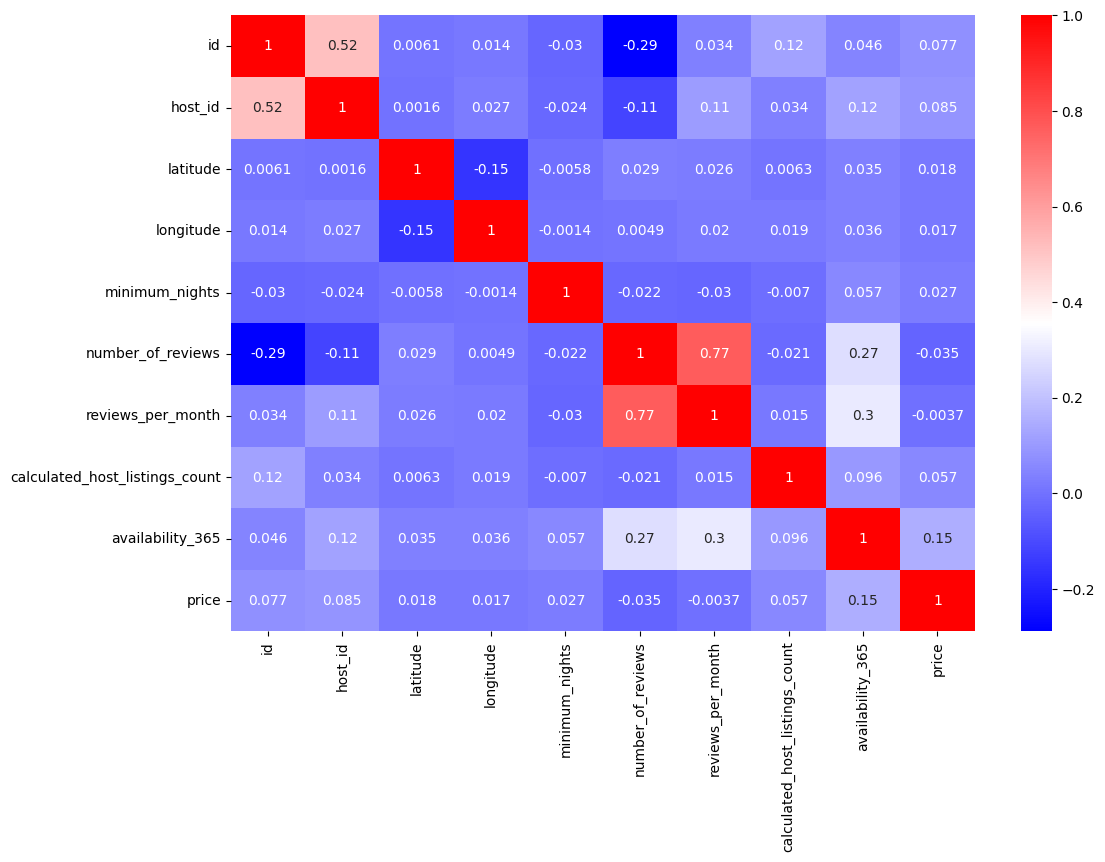

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),cmap='bwr',annot=True)

Data Cleaning

1.We will check if we have duplicates  rows in the data set given.

In [37]:
df_train.cp=df_train.copy()

<ipython-input-37-1a4a81c0b08a>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [38]:
df_train_dup=df_train[df_train.duplicated()]
df_train_dup.shape

(0, 15)

There are no duplicate records.

Now we will fill the missing values for the columns name,host_name,last_review,reviews_per_month.
object dtype columns i.e name and host_name will replace the missing values with mode and the other 2 with mean.

In [39]:
df_train['last_review'].mode()

0    08-03-2020
Name: last_review, dtype: object

In [40]:
df_train['last_review'].describe()

count          11305
unique          1495
top       08-03-2020
freq             269
Name: last_review, dtype: object

In [41]:
df_train['reviews_per_month'].describe()

count    11305.000000
mean         0.748501
std          1.260791
min          0.010000
25%          0.180000
50%          0.380000
75%          0.770000
max         50.000000
Name: reviews_per_month, dtype: float64

As the reviews column is in float we will apply the ceilling function.

In [42]:
#df_train['reviews_per_month']=df_train['reviews_per_month'].apply(np.round)

In [43]:
df_train['reviews_per_month'].describe()

count    11305.000000
mean         0.748501
std          1.260791
min          0.010000
25%          0.180000
50%          0.380000
75%          0.770000
max         50.000000
Name: reviews_per_month, dtype: float64

In [44]:
df_train['last_review']=pd.to_datetime(df_train['last_review'])

<ipython-input-44-db40ab2080e0>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [45]:
df_train['name'].fillna(df_train['name'].mode()[0], inplace=True)
df_train['host_name'].fillna(df_train['host_name'].mode()[0],inplace=True)
df_train['last_review'].fillna(df_train['last_review'].mean(),inplace=True)
df_train['reviews_per_month'].fillna(df_train['reviews_per_month'].mean(),inplace=True)

Dealing with the last_review datatime columns.split it into year,month,day

In [46]:
df_train["day"] = df_train['last_review'].map(lambda x: x.day)
df_train["month"] = df_train['last_review'].map(lambda x: x.month)
df_train["year"] = df_train['last_review'].map(lambda x: x.year)


In [47]:
aboutdf(df_train)

,datatype,unique_values,have_null?,Number of null values,percentage of null values
id,int64,12901,False,0,0.0
name,object,12653,False,0,0.0
host_id,int64,11601,False,0,0.0
host_name,object,4536,False,0,0.0
neighbourhood,object,22,False,0,0.0
latitude,float64,5227,False,0,0.0
longitude,float64,7887,False,0,0.0
room_type,object,4,False,0,0.0
minimum_nights,int64,56,False,0,0.0
number_of_reviews,int64,362,False,0,0.0


Now that we have replaces the missing values next step is to encode the object data types ....

encoding for the object columns name,host_name,neighbourhood

In [48]:
le = LabelEncoder()

In [49]:
df_train['name']=LabelEncoder().fit_transform(df_train['name'])
df_train['host_name']=LabelEncoder().fit_transform(df_train['host_name'])
df_train['neighbourhood']=LabelEncoder().fit_transform(df_train['neighbourhood'])
df_train['room_type']=LabelEncoder().fit_transform(df_train['room_type'])

check this code later

<Axes: xlabel='minimum_nights', ylabel='price'>

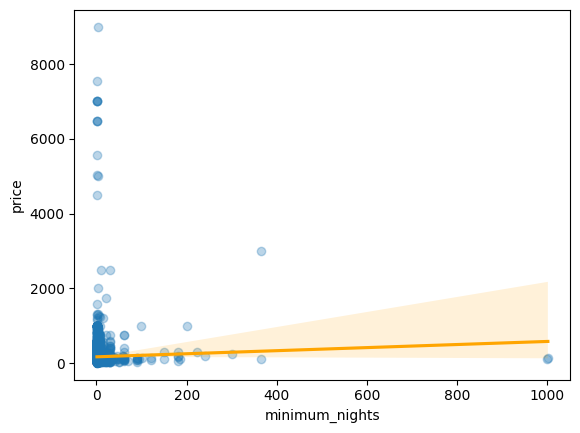

In [50]:
sns.regplot(x='minimum_nights',y='price',data=df_train,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

Now this has linear relation

now we wil normailize the data using the standard scalar ,before that we will split the target variable

In [51]:
#X=df_train.drop(columns=['price','last_review','id','host_id'],axis=1)
X=df_train.drop(columns=['price','last_review'],axis=1)# just check feature selection
y=df_train['price']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

Feature Selection

In [65]:
lgbm =LGBMRegressor()

In [66]:
lgbm =LGBMRegressor(random_state=4)
lgbm.fit(X_train,y_train)
bpred_train=lgbm.predict(X_train)
bpred=lgbm.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 9030, number of used features: 16
[LightGBM] [Info] Start training from score 165.987708


In [67]:
bmse_train=mean_squared_error(y_train,bpred_train)
brmse_train=math.sqrt(bmse_train)
print(brmse_train)


114.65801828043752


In [68]:
bmse_test=mean_squared_error(y_test,bpred)
brmse_test=math.sqrt(bmse_test)
print(brmse_test)


220.28635168900416
